<a href="https://colab.research.google.com/github/fernandaperon1/financas_quantitativas/blob/master/analise_portfolio_corrigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando bibliotecas

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wes
import wes
from datetime import datetime
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-ffwrqq99
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-ffwrqq99


In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

#1. Importação de dataset de preço histórico
Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

Google Finance (Via panda_datareader)
Yahoo Finace (Via panda_datareader ou yfinance)
Quandl
Investing.com (investpy)
Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

1.1) Plote os preços de fechamento
1.2) Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)


In [46]:
import pandas as pd
wes.set_palette('Zissou1')
import plotly.graph_objects as go
from datetime import datetime
!pip install plotly
import plotly
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
! pip install yfinance
import yfinance as yf








Iniciamos importanto as bibliotecas que iremos usar.

In [47]:
df=  yf.download('NFLX', start="2015-1-1", end="2022-1-1")
#primeira visualizacao dos dados:
print (df.head())


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  49.151428  50.331429  48.731430  49.848572  49.848572  13475000
2015-01-05  49.258572  49.258572  47.147144  47.311428  47.311428  18165000
2015-01-06  47.347141  47.639999  45.661430  46.501431  46.501431  16037700
2015-01-07  47.347141  47.421429  46.271427  46.742859  46.742859   9849700
2015-01-08  47.119999  47.835712  46.478573  47.779999  47.779999   9601900


In [48]:
df['Date']=df.index

In [49]:
wes.set_palette('GrandBudapest1')
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                 increasing_line_color= '#F241A3', decreasing_line_color= '#F2B705'
)])

fig.show()

Histórico da empresa: Fundada em 1997 por Marc Randolph e Reed Hastings, inicialmente num modelo de aluguel de DVDs. O modelo de streaming foi introduzido em 2007. Teve seu IPO em 2002.

A empresa teve sua estréia na bolsa de valores de São Paulo em 2014, com ações variando em torno de 16 reais. Agora, as mesmas valem cerca de 68 reais, mais do que quadruplicando seu valor.

As ações aumentaram muito de valor a partir de 2020, devido provavelmente ao boom de novos assinantes, com expansão de 15.8 milhões de novos assinantes. É possível ver que as ações caem ligeiramente após abril de 2021, com o início da vacinação em massa, e portanto menos acessos ao canal de streaming.

#2. Retorno e Risco
Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.



##Retorno Simples
Queremos calcular quanto, em termos percentuais, rendeu uma ação (tendo como base o dia em que ela foi comprada).

Dessa forma, iremos calcular quanto os ganhos representam do dispêndio para adquiri-la, obtendo a fórumula:

R= (Valor final - Valor Inicial)/ Valor inicial.
Isso nada mais é do que uma mudança percentual, e pode ser calculada com uma função do pandas, como mostraremos a seguir.



In [50]:
df['simp_return_netflix'] = df['Close'].pct_change()
df['simp_return_netflix'].head()


Date
2015-01-02         NaN
2015-01-05   -0.050897
2015-01-06   -0.017121
2015-01-07    0.005192
2015-01-08    0.022188
Name: simp_return_netflix, dtype: float64

Esse retorno percentual nos dá o retorno em um dia. Poderíamos, contudo, também calcular qual teria sido o retorno de alguém que comprou as ações em 2014, vendendo-as apenas em 2022. Como demonstrado abaixo, teríamos nesse caso um retorno de cerca de 240%.

In [51]:
df['simp_ret_cum_netflix'] = (df['simp_return_netflix'] + 1).cumprod()-1
df['simp_ret_cum_netflix'].tail()

Date
2021-12-27    11.299650
2021-12-28    11.251304
2021-12-29    11.247893
2021-12-30    11.278988
2021-12-31    11.085401
Name: simp_ret_cum_netflix, dtype: float64

##Retorno Logarítimico

###Diferença entre retorno logarítimico e retorno simples
Como já colocamos, o retorno linear é dado por (Pfinal-PInicial)/Pinicial, ao passo que o retorno logarítimico é dado por ln(pfinal/pinicial), calculado aqui por uma função do Numpy.
Usaremos o log retorno porque, em termos de retorno acumulado, ele é mais interessante pois ele simplifica a cona. Vale a pena adicionar, contudo, que para retornos pequenos (como é o caso para retornos diários de ações), os dois ficam muito próximos. 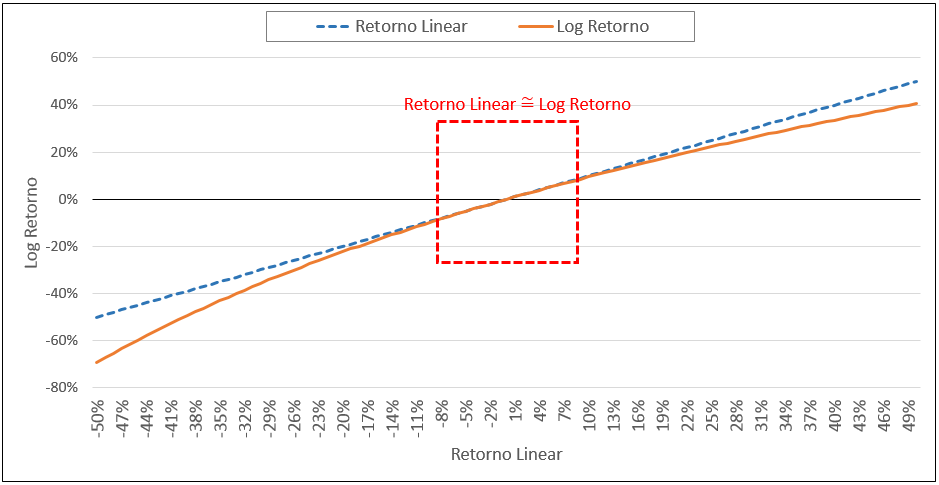

In [52]:
df['log_return_netflix'] = np.log(df['Close']/df['Close'].shift(1))
df['log_return_netflix'] .head(5)

Date
2015-01-02         NaN
2015-01-05   -0.052238
2015-01-06   -0.017269
2015-01-07    0.005178
2015-01-08    0.021946
Name: log_return_netflix, dtype: float64

##Cálculo de Risco
Para calcular o risco, a métrica mais utilizada é o desvio padrão. Isso porque, quanto mais volátil um ativo for, maior é o risco de perder (ou ganhar) dinheiro com ele. 

In [53]:
df['simp_return_netflix'].std() #calculamos o desvio padrão dos retornos


0.02590581347311385

Como podemos ver, o risco (desvio padrão) varia conforme a métrica utilizada, porém ainda assim é baixo, entre 3% e 7%.

In [54]:
df['log_return_netflix'].std()

0.02568155508207008

#3. Lidando com portfolios
Notebook de auxilio

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes.

Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos dados históricos de fechamento.
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de pesos de um portfolio

Atribua pesos () para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]


##Retorno Portfólio


In [55]:
# download dataframe using pandas_datareader
tickers= ['NFLX', 'AAPL', 'TSLA','MSFT']
df=  yf.download(tickers, start="2015-1-1", end="2022-1-1")['Adj Close']
df.tail()


[*********************100%***********************]  4 of 4 completed


,AAPL,MSFT,NFLX,TSLA
Date,,,,
2021-12-27,180.330002,342.450012,613.119995,1093.939941
2021-12-28,179.289993,341.250000,610.710022,1088.469971
2021-12-29,179.380005,341.950012,610.539978,1086.189941
2021-12-30,178.199997,339.320007,612.090027,1070.339966
2021-12-31,177.570007,336.320007,602.440002,1056.780029


In [56]:
peso= [0.25,0.25,0.25,0.25] #atribuimos pesos às variaveis
precos = yf.download(tickers, start="2015-1-1", end="2022-1-1")['Adj Close']
precos.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,MSFT,NFLX,TSLA
Date,,,,
2021-12-27,180.330002,342.450012,613.119995,1093.939941
2021-12-28,179.289993,341.250000,610.710022,1088.469971
2021-12-29,179.380005,341.950012,610.539978,1086.189941
2021-12-30,178.199997,339.320007,612.090027,1070.339966
2021-12-31,177.570007,336.320007,602.440002,1056.780029


In [57]:
r= precos.pct_change()
r

,AAPL,MSFT,NFLX,TSLA
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.050897,-0.042041
2015-01-06,0.000094,-0.014677,-0.017121,0.005664
2015-01-07,0.014022,0.012705,0.005192,-0.001562
2015-01-08,0.038422,0.029418,0.022188,-0.001564
...,...,...,...,...
2021-12-27,0.022975,0.023186,-0.001580,0.025248
2021-12-28,-0.005767,-0.003504,-0.003931,-0.005000
2021-12-29,0.000502,0.002051,-0.000278,-0.002095


In [58]:
# Retornos de Portfolio
R = np.dot(r, peso) 
pd.DataFrame(R, columns = ['R']) 



,R
0,NaN
1,-0.032576
2,-0.006510
3,0.007589
4,0.022116
...,...
1758,0.017457
1759,-0.004551
1760,0.000045
1761,-0.006581


In [59]:
retorno_cumulativo_carteira = np.cumprod(R[1:] + 1)-1
retorno_cumulativo_carteira

array([-0.03257648, -0.03887421, -0.03157992, ..., 14.03494116,
       13.93600032, 13.78361199])

Agora, para termos de comparação, iremos repetir a mesma operação para o ibovespa

In [60]:
ibv=  yf.download('^BVSP', start="2015-1-1", end="2022-1-1")['Adj Close']
df.tail()
ibov_r= ibv.pct_change()
ibov_r #retorno simples do ativo
ibov_cum = np.cumprod(ibv.pct_change()+1)-1
ibov_cum #retorno do ativo ao final do período


[*********************100%***********************]  1 of 1 completed


Date
2015-01-02         NaN
2015-01-05   -0.020510
2015-01-06   -0.010533
2015-01-07    0.019603
2015-01-08    0.029498
                ...   
2021-12-23    1.162166
2021-12-27    1.175359
2021-12-28    1.161609
2021-12-29    1.146005
2021-12-30    1.160744
Name: Adj Close, Length: 1730, dtype: float64

In [61]:
ibov_cum = np.cumprod(ibv.pct_change()+1)-1
ibov_cum #retorno do ativo ao final do período

Date
2015-01-02         NaN
2015-01-05   -0.020510
2015-01-06   -0.010533
2015-01-07    0.019603
2015-01-08    0.029498
                ...   
2021-12-23    1.162166
2021-12-27    1.175359
2021-12-28    1.161609
2021-12-29    1.146005
2021-12-30    1.160744
Name: Adj Close, Length: 1730, dtype: float64

Text(0.5, 1.0, 'Investimento de 1000R$ ao longo do tempo- CARTEIRA')

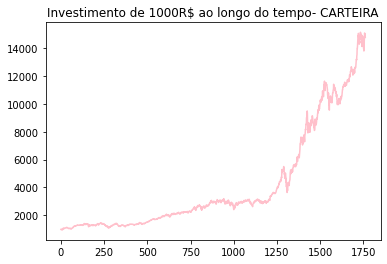

In [62]:
plt.plot(1000*(1+R[1:]).cumprod(), color = 'pink')
plt.title('Investimento de 1000R$ ao longo do tempo- CARTEIRA')

Text(0.5, 1.0, 'Investimento de 1000R$ ao longo do tempo- IBOVESPA')

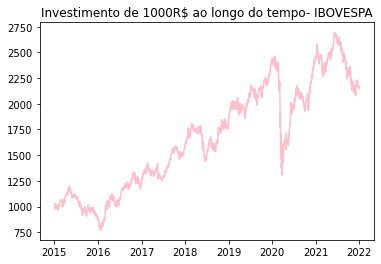

In [63]:
plt.plot(1000*(1+ibv.pct_change()).cumprod(), color = 'pink')
plt.title('Investimento de 1000R$ ao longo do tempo- IBOVESPA')

É possível observar, através do gráfico, que apesar da menor valorização da carteira em relação ao Ibovespa, ela teve ganhos menos interrompidos. 

##Risco Portfólio
Aqui calculamos o risco do portfólio, que é dado, como já discutido, pela volatilidade (ou seja, o desvio padrão) do portfólio em questão, sintetizado pela seguinte fórmula:



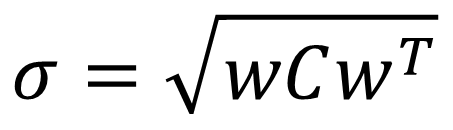


In [64]:
covariance = np.cov(r[1:].T)
a = np.array([0.25,0.25,0.25,0.25])[np.newaxis]
risco = np.sqrt(np.dot(a, np.dot(covariance, a.T))) * np.sqrt(252)
print ('O risco do portfólio é 28,7%')

O risco do portfólio é 28,7%


Gráfico de Correlação (Heatmap)
Como é possível perceber, a correlação entre as variáveis é extremamente alta, muito provavelmente devido ao fato de serem todas empresas do setor de tecnologia. Dessa forma, não seria uma boa escolha de investimento pois é um portfólio muito pouco diversificado.

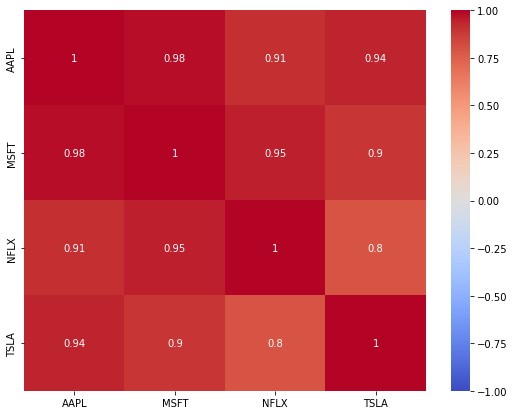

In [65]:
# aqui usamos a função .corr do pandas para achar a correlação entre todas as colunas
corr = df.corr()

plt.figure(figsize=(9,7))

# aqui criamos o heatmap (ou gráfico de correlação), seu valor máximo é 1 e o mínimo é -1
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=np.round(corr.values, 2), cmap='coolwarm') 
plt.show()

##Teoria Moderna do Portfólio- Markowitz
Teoria Moderna de Portifolio - Markowitz
Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. A maneira mais simples de encontrar a melhor solução é via simulação. Portanto simula-se diversos pesos, e para cada peso é calculado seu retorno esperado e risco.

3.4) Otimize a carteira e obtenha o portfolio com o melhor retorno ajustado ao risco (Sharpe Ratio)
A teoria moderna do portfólio tem como objetivo maximizar os investimentos de uma carteira de investimento. Ela foi inventada pelo vencedor do Prêmio Nobel, Harry Markowitz. Em poucas palavras, trabalharemos com a ideia de que existiaria um *trade off* entre risco e retorno, de maneira que ao montar uma carteira que maximize a utilidade do indivíduo, devemos distribuir os ativos de forma a balancear risco e retorno. 

##Otimização da carteira

Sharpe Ratio
O sharpe ratio é utilizado para quantificar o desempenho de determinado investimento, em comparação com um ativo sem risco (como investimento em um título de renda fixa ou no tesouro, por exemplo). 
Ele é dado pelo (Retorno do portfólio - Retorno do ativo sem risco)/volatilidade.
Em geral, para ser considerado bom a razão deve ser maior que 1. 
Agora, iremos simular difentes pesos para a carteira de ativos, a fim de descobrir qual gerará maior retorno ao investidor.

In [66]:
def gerar_carteira(df, quant = 1000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(quant):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [67]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [68]:
carteiras = gerar_carteira(df)
best_portfolio(carteiras)

array([0.20249348, 0.35181716, 0.2257661 , 0.21992326])

Dessa forma, um portfólio com ações da Apple, Microsoft, Netflix e Tesla maximizaria o retorno se fosse investido na proporção (aproximada) de 18,5%, 39,6%, 21% e 20,6%.


###Backtesting

In [69]:
#portfólio de 2015 a 2022, com benchmark= ibovespa
tickers= ['NFLX', 'AAPL', 'TSLA','MSFT', '^BVSP']
df_backtest=  yf.download(tickers, start="2015-1-1", end="2022-1-1")['Adj Close']
retorno = df_backtest.pct_change()


[*********************100%***********************]  5 of 5 completed


In [70]:
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0]=1 #impede que df comece com nan
retorno_acumulado

,AAPL,MSFT,NFLX,TSLA,^BVSP
Date,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.971828,0.990804,0.949103,0.957959,0.979490
2015-01-06,0.971920,0.976262,0.932854,0.963385,0.989467
2015-01-07,0.985548,0.988665,0.937697,0.961880,1.019603
2015-01-08,1.023415,1.017750,0.958503,0.960376,1.029498
...,...,...,...,...,...
2021-12-27,7.287239,8.313135,12.299650,24.940494,2.175359
2021-12-28,7.245212,8.284004,12.251304,24.815785,2.161609
2021-12-29,7.248850,8.300997,12.247893,24.763804,2.146005


In [71]:
carteira = 1000*retorno_acumulado.iloc[:,:4] #tiramos ibovespa
carteira['saldo']= carteira.sum(axis=1) #saldo da carteira é a soma horizontal do preço dos ativos
carteira['retorno']=carteira['saldo'].pct_change()
carteira

,AAPL,MSFT,NFLX,TSLA,saldo,retorno
Date,,,,,,
2015-01-02,1000.000000,1000.000000,1000.000000,1000.000000,4000.000000,NaN
2015-01-05,971.828335,990.803910,949.102981,957.959100,3869.694325,-0.032576
2015-01-06,971.919671,976.261724,932.853818,963.385185,3844.420398,-0.006531
2015-01-07,985.548360,988.665323,937.697054,961.880423,3873.791159,0.007640
2015-01-08,1023.415317,1017.749974,958.502863,960.375747,3960.043901,0.022266
...,...,...,...,...,...,...
2021-12-27,7287.239454,8313.134890,12299.650186,24940.494131,52840.518661,0.018245
2021-12-28,7245.212108,8284.004030,12251.304304,24815.785482,52596.305924,-0.004622
2021-12-29,7248.849529,8300.997155,12247.893094,24763.803600,52561.543378,-0.000661


Obtemos retorno diário dos ativos, e quanto teríamos ao fim do período caso tivéssemos iniciado investindo 1000 em cada ação. 

Resultado do Backtest para uma carteira com pesos igualmente distribuídos: 


Start date,2015-01-02
End date,2021-12-31
Total months,85
,Backtest
Annual return,42.903%
Cumulative returns,1187.968%
Annual volatility,30.317%
Sharpe ratio,1.33
Calmar ratio,1.35
Stability,0.94
Max drawdown,-31.774%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.77,2018-06-20,2018-12-24,2019-12-16,389
1,30.34,2020-02-19,2020-03-16,2020-05-06,56
2,28.14,2015-12-04,2016-02-08,2016-12-21,274
3,23.04,2021-01-26,2021-03-08,2021-09-07,161
4,17.49,2020-09-01,2020-09-08,2020-11-27,64


Stress Events,mean,min,max
Fall2015,-0.24%,-6.36%,6.11%
New Normal,0.16%,-13.48%,9.51%


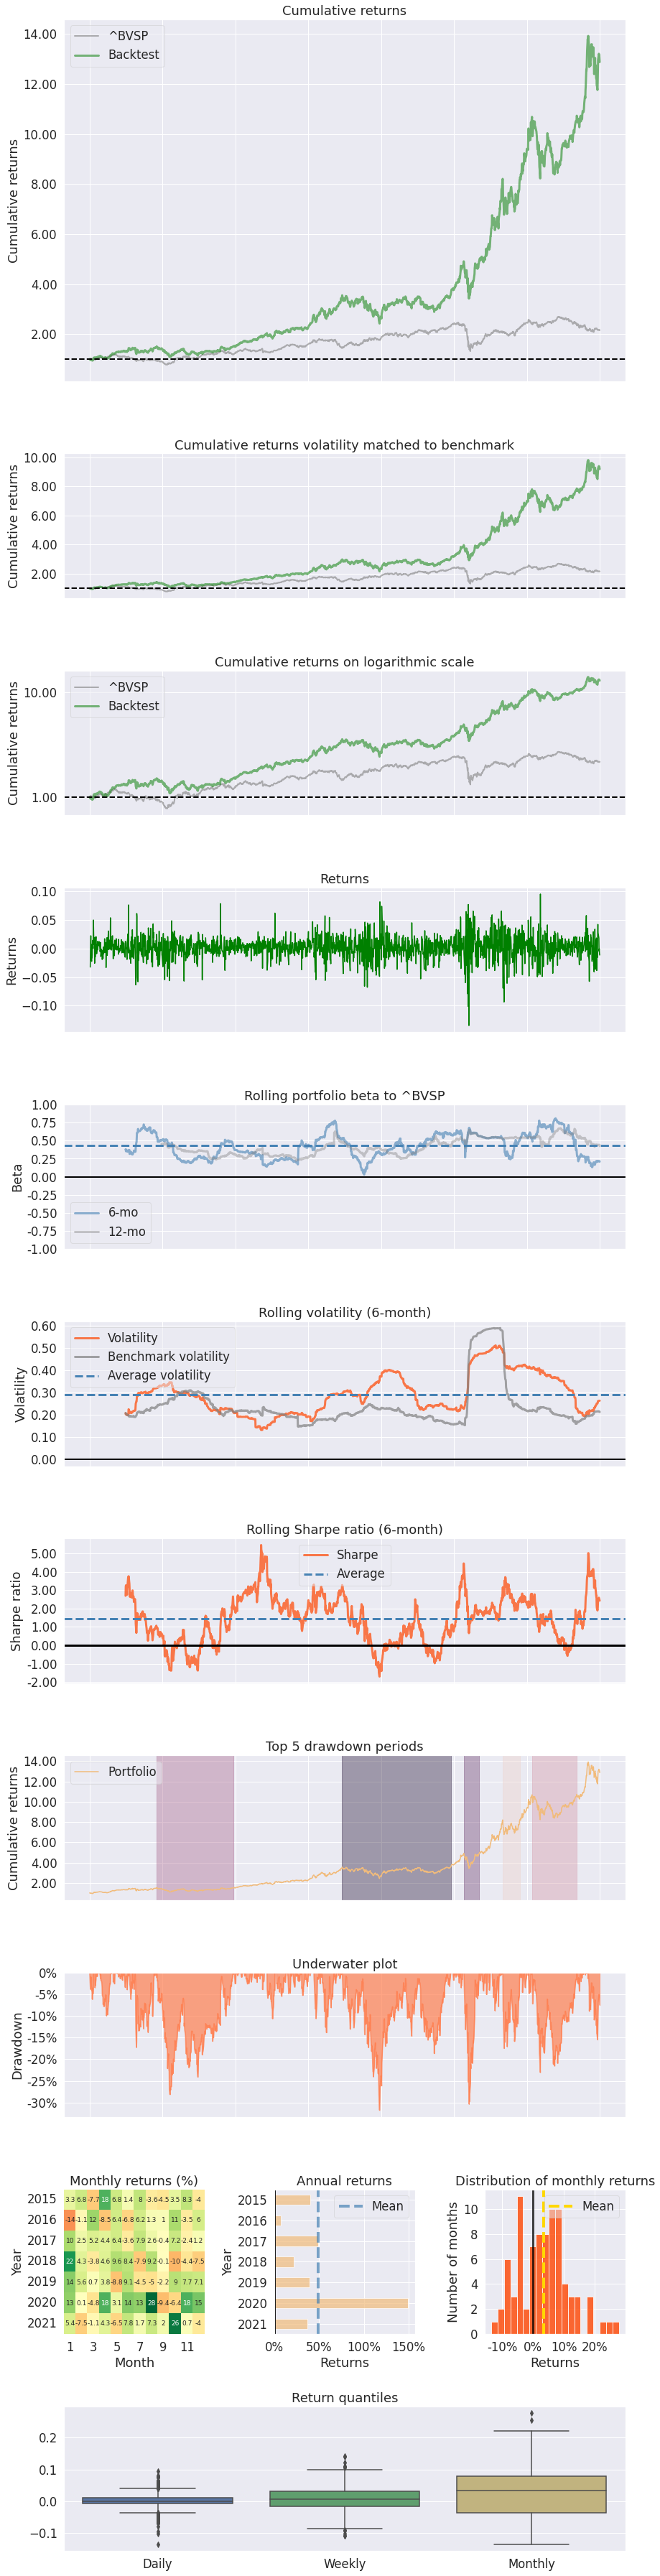

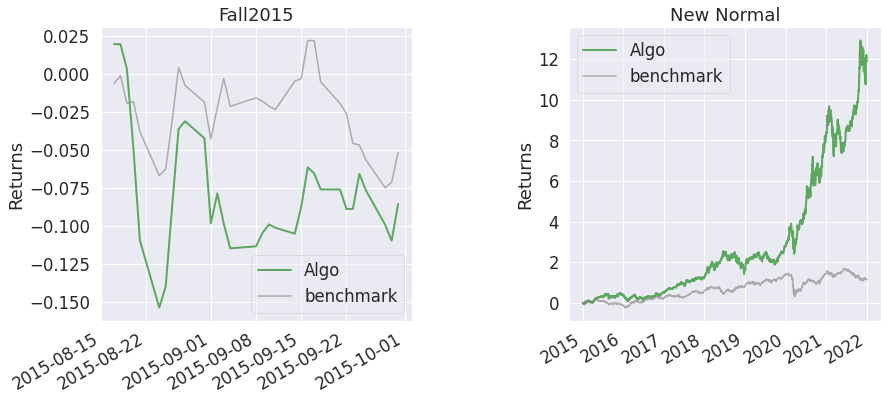

In [72]:
pf.create_full_tear_sheet(carteira['retorno'], benchmark_rets=retorno['^BVSP'])

Agora, vamos fazer o mesmo para os pesos otimizados:

In [73]:
peso= [0.16844766, 0.41200352, 0.21320629, 0.20634252]
carteira_otimizada= 4000*retorno_acumulado.iloc[:,:4]
carteira_otimizada['AAPL']= 0.16844766*carteira_otimizada['AAPL']
carteira_otimizada['MSFT']= 0.41200352*carteira_otimizada['MSFT']
carteira_otimizada['NFLX']= 0.21320629*carteira_otimizada['NFLX']
carteira_otimizada['TSLA']= 0.20634252*carteira_otimizada['TSLA']
carteira_otimizada['saldo']= carteira_otimizada.sum(axis=1) #saldo da carteira é a soma horizontal do preço dos ativos
carteira_otimizada['retorno']=carteira_otimizada['saldo'].pct_change()
carteira_otimizada



,AAPL,MSFT,NFLX,TSLA,saldo,retorno
Date,,,,,,
2015-01-02,673.790640,1648.014080,852.825160,825.370080,3999.999960,NaN
2015-01-05,654.808836,1632.858794,809.418902,790.670779,3887.757310,-0.028061
2015-01-06,654.870377,1608.893066,795.561207,795.149307,3854.473958,-0.008561
2015-01-07,664.053260,1629.334373,799.691640,793.907321,3886.986594,0.008435
2015-01-08,689.567661,1677.266287,817.435358,792.665407,3976.934713,0.023141
...,...,...,...,...,...,...
2021-12-27,4910.073735,13700.163348,10489.451138,20585.137636,49684.825857,0.018679
2021-12-28,4881.756103,13652.155280,10448.220553,20482.206849,49464.338786,-0.004438
2021-12-29,4884.206963,13680.160190,10445.311388,20439.302558,49448.981099,-0.000310


Start date,2015-01-02
End date,2021-12-31
Total months,85
,Backtest
Annual return,41.696%
Cumulative returns,1112.062%
Annual volatility,28.951%
Sharpe ratio,1.35
Calmar ratio,1.39
Stability,0.95
Max drawdown,-29.891%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.89,2020-02-19,2020-03-16,2020-05-07,57
1,28.73,2018-10-01,2018-12-24,2019-04-23,147
2,25.65,2015-12-04,2016-02-08,2016-10-21,231
3,20.58,2021-01-26,2021-03-08,2021-08-30,155
4,16.69,2015-08-05,2015-08-24,2015-11-06,68


Stress Events,mean,min,max
Fall2015,-0.23%,-6.27%,6.06%
New Normal,0.16%,-13.71%,8.78%


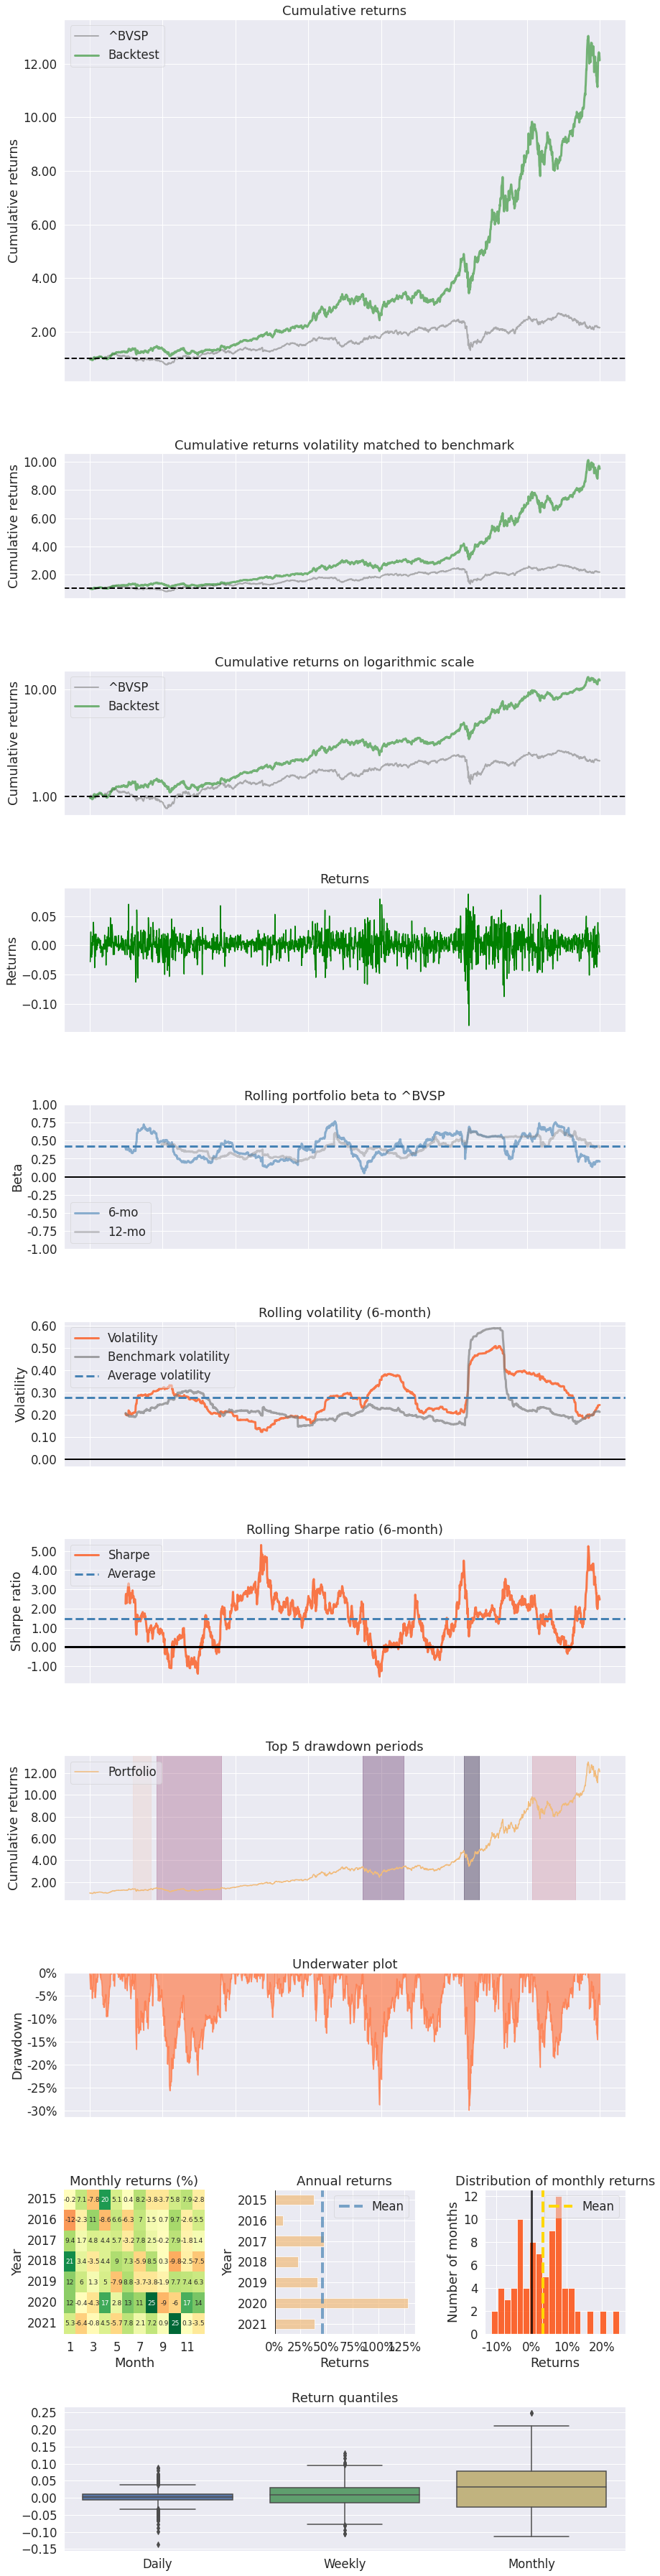

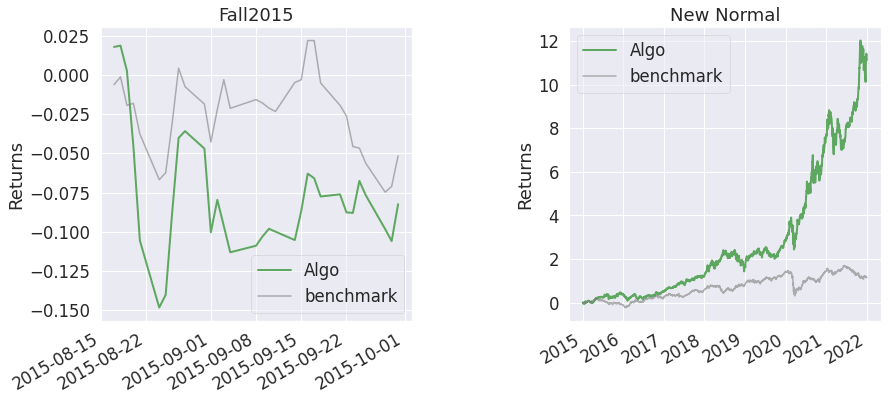

In [74]:
pf.create_full_tear_sheet(carteira_otimizada['retorno'], benchmark_rets=retorno['^BVSP'])

? Carteira otimizada tem retorno anual menor, apesar de melhor sharpe ratio.

#4. Previsão de Time Series
Cross validation em Séries Temporais
Sempre que lidamos com algoritmos de machine learning, para treiná-los temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação ao longo do tempo:

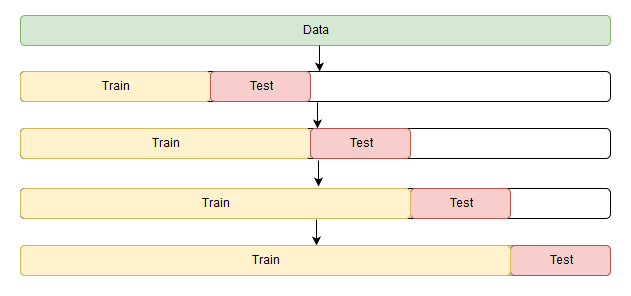



Feature Engeneering

[*********************100%***********************]  1 of 1 completed


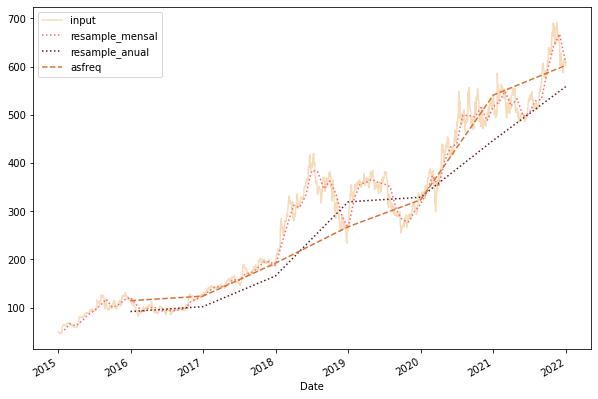

In [75]:
df_nflx= yf.download('NFLX', start="2015-1-1", end="2022-1-1")
df_nflx['Close'].plot(alpha=0.5, style='-', figsize=(10,7))
df_nflx['Close'].resample('M').mean().plot(style=':') 
df_nflx['Close'].resample('BA').mean().plot(style=':') 
df_nflx['Close'].asfreq('BA').plot(style='--');
plt.legend(['input', 'resample_mensal', 'resample_anual', 'asfreq'],
           loc='upper left');


Predição com regressão linear

In [95]:
df_nflx['retorno'] = df_nflx['Close'].pct_change()
df_nflx['cumulativo'] = (df_nflx['retorno'] + 1).cumprod()-1
df_nflx['lag'] = df_nflx['Close'].shift(5)
df_nflx.dropna(inplace=True)
df_nflx.head(100)


,Open,High,Low,Close,Adj Close,Volume,retorno,cumulativo,lag
Date,,,,,,,,,
2016-06-01,101.500000,101.919998,100.160004,101.510002,101.510002,8393400,-0.010334,0.036980,97.889999
2016-06-02,101.389999,102.150002,100.769997,101.250000,101.250000,7992400,-0.002561,0.034324,100.199997
2016-06-03,100.989998,101.000000,98.529999,99.589996,99.589996,9224000,-0.016395,0.017366,102.809998
2016-06-06,100.290001,101.070000,99.720001,100.739998,100.739998,6828100,0.011547,0.029114,103.300003
2016-06-07,101.199997,101.629997,99.769997,99.889999,99.889999,6474700,-0.008438,0.020431,102.570000
...,...,...,...,...,...,...,...,...,...
2016-10-14,101.589996,102.099998,100.349998,101.470001,101.470001,9531100,0.012372,0.036572,104.820000
2016-10-17,100.500000,100.730003,98.379997,99.800003,99.800003,26589500,-0.016458,0.019512,103.330002
2016-10-18,116.629997,119.820000,116.500000,118.790001,118.790001,42168200,0.190281,0.213505,100.589996


In [96]:
X = np.array(df_nflx.drop('Close', axis=1))
y = np.array(df_nflx['Close'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.33)

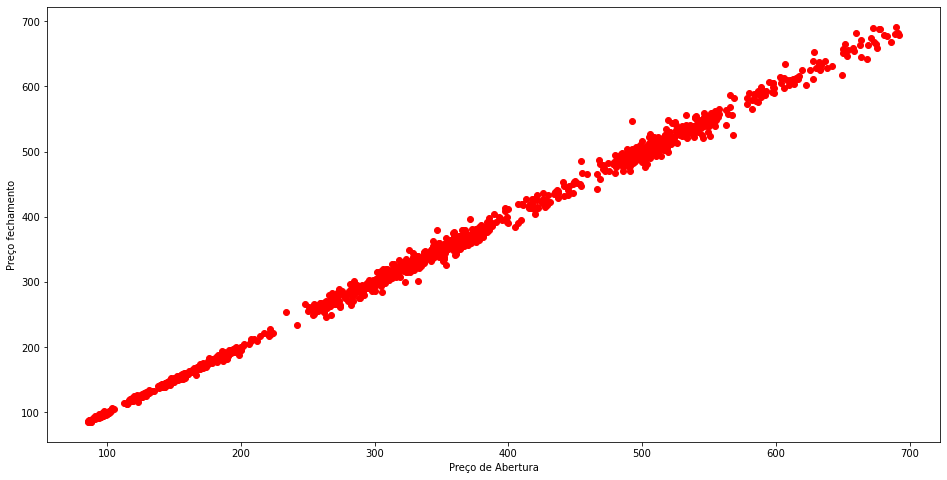

In [97]:
plt.figure(figsize = (16,8))
plt.scatter(
    df_nflx['Open'], 
    df_nflx['Close'], 
    c='red')
plt.xlabel("Preço de Abertura")
plt.ylabel("Preço fechamento")
plt.show()

In [101]:
lr = LinearRegression(normalize=True, fit_intercept=False) # Cria um modelo de regressão linear
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [102]:
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 1.0


<Figure size 1080x864 with 0 Axes>

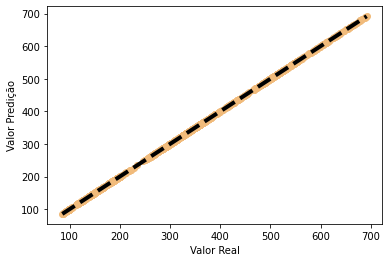

In [98]:
plt.figure(figsize=(15,12))
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt



predicted = cross_val_predict(lr, df_nflx, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor Real')
ax.set_ylabel('Valor Predição')
plt.show()